In [2]:
## import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [108]:
plt.style.use('default')

In [109]:
# set it to convert scientific values
pd.options.display.float_format = '{:.2f}'.format 

In [110]:
# read dataset
loandata= pd.read_csv('loan.csv')
loandata.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.00,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.00,0.00,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.00,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.00,0.00,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.00,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.00,0.00,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.00,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.00,0.00,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.00,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.00,0.00,NaN,NaN,NaN,NaN


In [111]:
loandata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


In [112]:
loandata.shape

(39717, 111)

## Data cleaning
Lets find Which columns have all null values

In [113]:
loandata.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64

In [114]:
# Drop columns where all values are null.
loandata.dropna(axis=1, how='all', inplace=True)
loandata.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.00,36 months,10.65%,162.87,B,B2,...,NaN,May-16,0.00,1,INDIVIDUAL,0,0.00,0,0.00,0.00
1,1077430,1314167,2500,2500,2500.00,60 months,15.27%,59.83,C,C4,...,NaN,Sep-13,0.00,1,INDIVIDUAL,0,0.00,0,0.00,0.00
2,1077175,1313524,2400,2400,2400.00,36 months,15.96%,84.33,C,C5,...,NaN,May-16,0.00,1,INDIVIDUAL,0,0.00,0,0.00,0.00
3,1076863,1277178,10000,10000,10000.00,36 months,13.49%,339.31,C,C1,...,NaN,Apr-16,0.00,1,INDIVIDUAL,0,0.00,0,0.00,0.00
4,1075358,1311748,3000,3000,3000.00,60 months,12.69%,67.79,B,B5,...,Jun-16,May-16,0.00,1,INDIVIDUAL,0,0.00,0,0.00,0.00


### Let us see if there are any columns with unique or single values in them.

In [115]:
single_value_columns = loandata.nunique()
single_value_columns

id                            39717
member_id                     39717
loan_amnt                       885
funded_amnt                    1041
funded_amnt_inv                8205
term                              2
int_rate                        371
installment                   15383
grade                             7
sub_grade                        35
emp_title                     28820
emp_length                       11
home_ownership                    5
annual_inc                     5318
verification_status               3
issue_d                          55
loan_status                       3
pymnt_plan                        1
url                           39717
desc                          26527
purpose                          14
title                         19615
zip_code                        823
addr_state                       50
dti                            2868
delinq_2yrs                      11
earliest_cr_line                526
inq_last_6mths              

we can actually look at those columns with single value and drop them as they will be no use for our analysis

In [116]:
c1 = single_value_columns[single_value_columns.values == 1]
c1.index

Index(['pymnt_plan', 'initial_list_status', 'collections_12_mths_ex_med',
       'policy_code', 'application_type', 'acc_now_delinq',
       'chargeoff_within_12_mths', 'delinq_amnt', 'tax_liens'],
      dtype='object')

In [117]:
loandata.drop(columns = list(c1.index), inplace=True)
loandata.shape

(39717, 48)

In [118]:
loandata.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,pub_rec_bankruptcies
0,1077501,1296599,5000,5000,4975.00,36 months,10.65%,162.87,B,B2,...,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,NaN,May-16,0.00
1,1077430,1314167,2500,2500,2500.00,60 months,15.27%,59.83,C,C4,...,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.00
2,1077175,1313524,2400,2400,2400.00,36 months,15.96%,84.33,C,C5,...,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,NaN,May-16,0.00
3,1076863,1277178,10000,10000,10000.00,36 months,13.49%,339.31,C,C1,...,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,NaN,Apr-16,0.00
4,1075358,1311748,3000,3000,3000.00,60 months,12.69%,67.79,B,B5,...,2475.94,1037.39,0.00,0.00,0.00,May-16,67.79,Jun-16,May-16,0.00


### Remove columns with too many missing values

In [119]:
# Remove columns with too many missing values
loandata.dropna(thresh=len(loandata) * 0.7, axis=1, inplace=True)
loandata.shape

(39717, 44)

In [120]:
loandata.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies
0,1077501,1296599,5000,5000,4975.00,36 months,10.65%,162.87,B,B2,...,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,May-16,0.00
1,1077430,1314167,2500,2500,2500.00,60 months,15.27%,59.83,C,C4,...,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,0.00
2,1077175,1313524,2400,2400,2400.00,36 months,15.96%,84.33,C,C5,...,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,May-16,0.00
3,1076863,1277178,10000,10000,10000.00,36 months,13.49%,339.31,C,C1,...,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,Apr-16,0.00
4,1075358,1311748,3000,3000,3000.00,60 months,12.69%,67.79,B,B5,...,3513.33,2475.94,1037.39,0.00,0.00,0.00,May-16,67.79,May-16,0.00


### We have now 44 columns out of which some columns are created after a loan application is approved
- The company wants to know which loan applications are risky. 
- Therefore, the fields that are created after a loan application is approved doesn't make sense for our analysis towards the business objective.
- Also columns like id, member_id & url are different for each application. zip_code could have been a useful driver, but it contains only partial data which might impute our analysis negatively.
- lets remove these columns

In [121]:

del_cols = ["member_id","url","title","emp_title","zip_code","addr_state","out_prncp","out_prncp_inv","total_pymnt","total_pymnt_inv",
            "delinq_2yrs","total_rec_prncp","total_rec_int","total_rec_late_fee","recoveries","collection_recovery_fee",
            "last_pymnt_d","last_pymnt_amnt","last_credit_pull_d","revol_bal","pub_rec_bankruptcies"]
loandata.drop(columns=del_cols, inplace=True)
loandata.shape

(39717, 23)

In [122]:
loandata.columns

Index(['id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_length', 'home_ownership',
       'annual_inc', 'verification_status', 'issue_d', 'loan_status',
       'purpose', 'dti', 'earliest_cr_line', 'inq_last_6mths', 'open_acc',
       'pub_rec', 'revol_util', 'total_acc'],
      dtype='object')

In [123]:
loandata.head()

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,...,issue_d,loan_status,purpose,dti,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_util,total_acc
0,1077501,5000,5000,4975.00,36 months,10.65%,162.87,B,B2,10+ years,...,Dec-11,Fully Paid,credit_card,27.65,Jan-85,1,3,0,83.70%,9
1,1077430,2500,2500,2500.00,60 months,15.27%,59.83,C,C4,< 1 year,...,Dec-11,Charged Off,car,1.00,Apr-99,5,3,0,9.40%,4
2,1077175,2400,2400,2400.00,36 months,15.96%,84.33,C,C5,10+ years,...,Dec-11,Fully Paid,small_business,8.72,Nov-01,2,2,0,98.50%,10
3,1076863,10000,10000,10000.00,36 months,13.49%,339.31,C,C1,10+ years,...,Dec-11,Fully Paid,other,20.00,Feb-96,1,10,0,21%,37
4,1075358,3000,3000,3000.00,60 months,12.69%,67.79,B,B5,1 year,...,Dec-11,Current,other,17.94,Jan-96,0,15,0,53.90%,38


Lets format employment length column to have only numbers. It may play important role in analysis further.

In [124]:
# format the employment length by using regular expression
loandata.emp_length.fillna('0',inplace=True)
loandata['emp_length']=loandata.emp_length.str.extract('(\d+)')
loandata.head()

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,...,issue_d,loan_status,purpose,dti,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_util,total_acc
0,1077501,5000,5000,4975.00,36 months,10.65%,162.87,B,B2,10,...,Dec-11,Fully Paid,credit_card,27.65,Jan-85,1,3,0,83.70%,9
1,1077430,2500,2500,2500.00,60 months,15.27%,59.83,C,C4,1,...,Dec-11,Charged Off,car,1.00,Apr-99,5,3,0,9.40%,4
2,1077175,2400,2400,2400.00,36 months,15.96%,84.33,C,C5,10,...,Dec-11,Fully Paid,small_business,8.72,Nov-01,2,2,0,98.50%,10
3,1076863,10000,10000,10000.00,36 months,13.49%,339.31,C,C1,10,...,Dec-11,Fully Paid,other,20.00,Feb-96,1,10,0,21%,37
4,1075358,3000,3000,3000.00,60 months,12.69%,67.79,B,B5,1,...,Dec-11,Current,other,17.94,Jan-96,0,15,0,53.90%,38


In [125]:
# Lets remove % symbol from intrest rate column so that it can be used in calculations
loandata['int_rate'] = loandata['int_rate'].str.rstrip('%')

# Lets remove % symbol from revol_util column so that it can be used in calculations
loandata['revol_util'] = loandata['revol_util'].str.rstrip('%')

### convert amount columns into numeric data to find some correlation among important ones.

In [126]:
cols1 = ['loan_amnt','funded_amnt','int_rate','funded_amnt_inv','installment','annual_inc','dti','emp_length']
loandata[cols1] = loandata[cols1].apply(pd.to_numeric)

### Lets take a look on important variable loan status in total loans issued

In [127]:
(loandata.loan_status.value_counts()*100)/len(loandata)

Fully Paid    82.96
Charged Off   14.17
Current        2.87
Name: loan_status, dtype: float64

Since loan status "Current" doesnt give any info for our analysis for approving or rejecting application, so dropping this data makes sense

In [128]:
# remove Current status form loan status
loandata = loandata[loandata.loan_status != 'Current']
loandata.shape

(38577, 23)

Lets take a look on important variable purpose of loan in total loans issued

In [129]:
# % distribution of loan
(loandata.purpose.value_counts()*100)/len(loandata)

debt_consolidation   46.80
credit_card          13.03
other                10.02
home_improvement      7.45
major_purchase        5.57
small_business        4.55
car                   3.89
wedding               2.40
medical               1.77
moving                1.49
vacation              0.97
house                 0.95
educational           0.84
renewable_energy      0.26
Name: purpose, dtype: float64

### Derive Columns For Analysis -
- Lets derive some new columns using existing data as it may further used in analysis.
- create month and year columns separately

In [130]:
loandata.issue_d = pd.to_datetime(loandata.issue_d, format='%b-%y')
loandata['year']=loandata['issue_d'].dt.year
loandata['month']=loandata['issue_d'].dt.month

loandata.head()

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,...,purpose,dti,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_util,total_acc,year,month
0,1077501,5000,5000,4975.00,36 months,10.65,162.87,B,B2,10,...,credit_card,27.65,Jan-85,1,3,0,83.70,9,2011,12
1,1077430,2500,2500,2500.00,60 months,15.27,59.83,C,C4,1,...,car,1.00,Apr-99,5,3,0,9.40,4,2011,12
2,1077175,2400,2400,2400.00,36 months,15.96,84.33,C,C5,10,...,small_business,8.72,Nov-01,2,2,0,98.50,10,2011,12
3,1076863,10000,10000,10000.00,36 months,13.49,339.31,C,C1,10,...,other,20.00,Feb-96,1,10,0,21,37,2011,12
5,1075269,5000,5000,5000.00,36 months,7.90,156.46,A,A4,3,...,wedding,11.20,Nov-04,3,9,0,28.30,12,2011,12


### Segmented Univariate Analysis
#### categorise loan amounts into buckets which will help in analysis further in bivariate analysis.
- Let's Create 4 derived columns loan_amnt_cats, annual_inc_cats, int_rate_cats, dti_cats

In [131]:
loandata['loan_amnt_cats'] = pd.cut(loandata['loan_amnt'], [0, 7000, 14000, 21000, 28000, 35000], labels=['0-7000', '7000-14000', '14000-21000', '21000-28000', '28000 +'])

- categorise annual incomes into buckets which will help in analysis further in bivariate analysis.

In [132]:
loandata['annual_inc_cats'] = pd.cut(loandata['annual_inc'], [0, 20000, 40000, 60000, 80000,1000000], labels=['0-20000', '20000-40000', '40000-60000', '60000-80000', '80000 +'])

- categorise intrest rates into buckets which will help in analysis further in bivariate analysis.

In [133]:
loandata['int_rate_cats'] = pd.cut(loandata['int_rate'], [0, 10, 12.5, 16, 20], labels=['0-10', '10-13', '12.5-16', '16 +'])

- categorise dti into buckets for bivariate analysis.

In [134]:
loandata['dti_cats'] = pd.cut(loandata['dti'], [0, 5, 10, 15, 20, 25], labels=['0-5', '05-10', '10-15', '15-20', '25+'])

In [135]:
loandata.shape

(38577, 29)

In [136]:
loandata.head(2)

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,...,open_acc,pub_rec,revol_util,total_acc,year,month,loan_amnt_cats,annual_inc_cats,int_rate_cats,dti_cats
0,1077501,5000,5000,4975.00,36 months,10.65,162.87,B,B2,10,...,3,0,83.70,9,2011,12,0-7000,20000-40000,10-13,NaN
1,1077430,2500,2500,2500.00,60 months,15.27,59.83,C,C4,1,...,3,0,9.40,4,2011,12,0-7000,20000-40000,12.5-16,0-5


### Univariate Analysis
- Basic statistics with .describe() - Quantitative Variables

In [137]:
loandata['loan_amnt'].describe()

count   38577.00
mean    11047.03
std      7348.44
min       500.00
25%      5300.00
50%      9600.00
75%     15000.00
max     35000.00
Name: loan_amnt, dtype: float64

<AxesSubplot:xlabel='loan_amnt'>

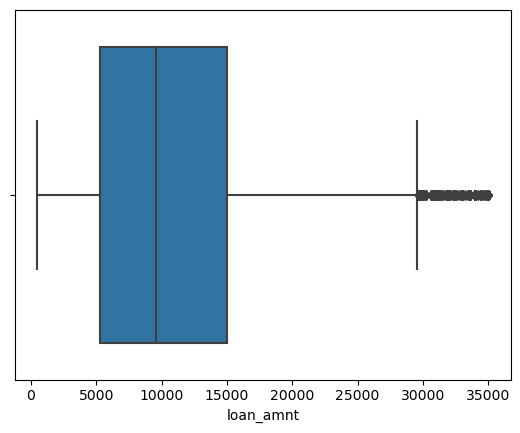

In [138]:
sns.boxplot(loandata.loan_amnt)

- Basic statistics with .describe() - annual_inc

In [139]:
loandata.annual_inc.describe()

count     38577.00
mean      68777.97
std       64218.68
min        4000.00
25%       40000.00
50%       58868.00
75%       82000.00
max     6000000.00
Name: annual_inc, dtype: float64

<AxesSubplot:xlabel='annual_inc'>

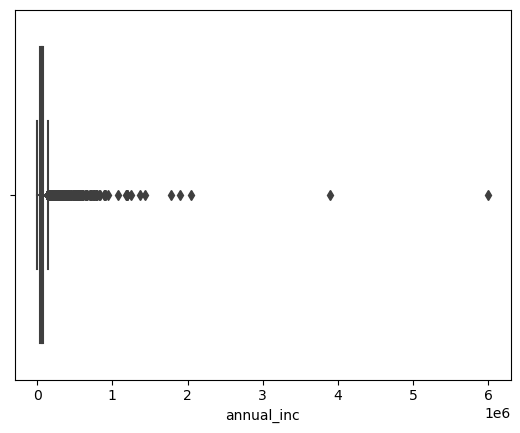

In [140]:
# plot the graph to see the outliers
sns.boxplot(loandata.annual_inc)

- Remove Outliers quantile .99 from Annual Income

In [142]:
loandata = loandata[loandata.annual_inc < loandata.annual_inc.quantile(0.99)]
loandata.annual_inc.describe()

count    37808.00
mean     63886.14
std      32301.03
min       4000.00
25%      40000.00
50%      57600.00
75%      80000.00
max     188004.00
Name: annual_inc, dtype: float64

<AxesSubplot:xlabel='annual_inc'>

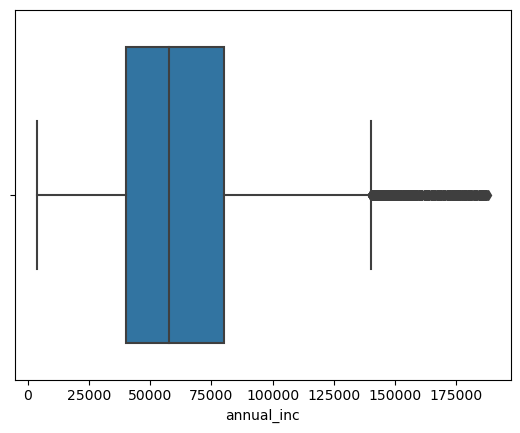

In [143]:
sns.boxplot(loandata.annual_inc)

- Basic statistics with .describe() - int_rate

In [145]:
loandata['int_rate'].describe()

count   37808.00
mean       11.91
std         3.68
min         5.42
25%         8.94
50%        11.71
75%        14.35
max        24.40
Name: int_rate, dtype: float64

<AxesSubplot:xlabel='int_rate'>

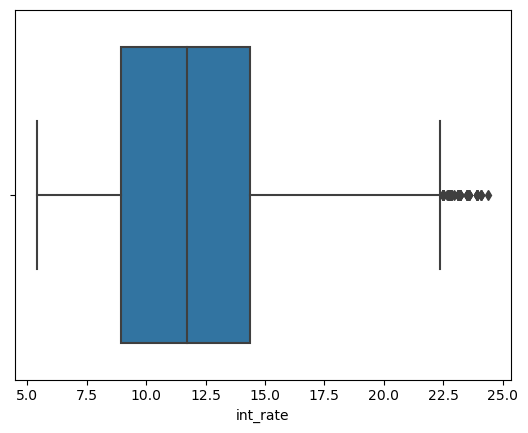

In [146]:
sns.boxplot(loandata.int_rate)

### Correlation Matrix - Quantitative Variables :

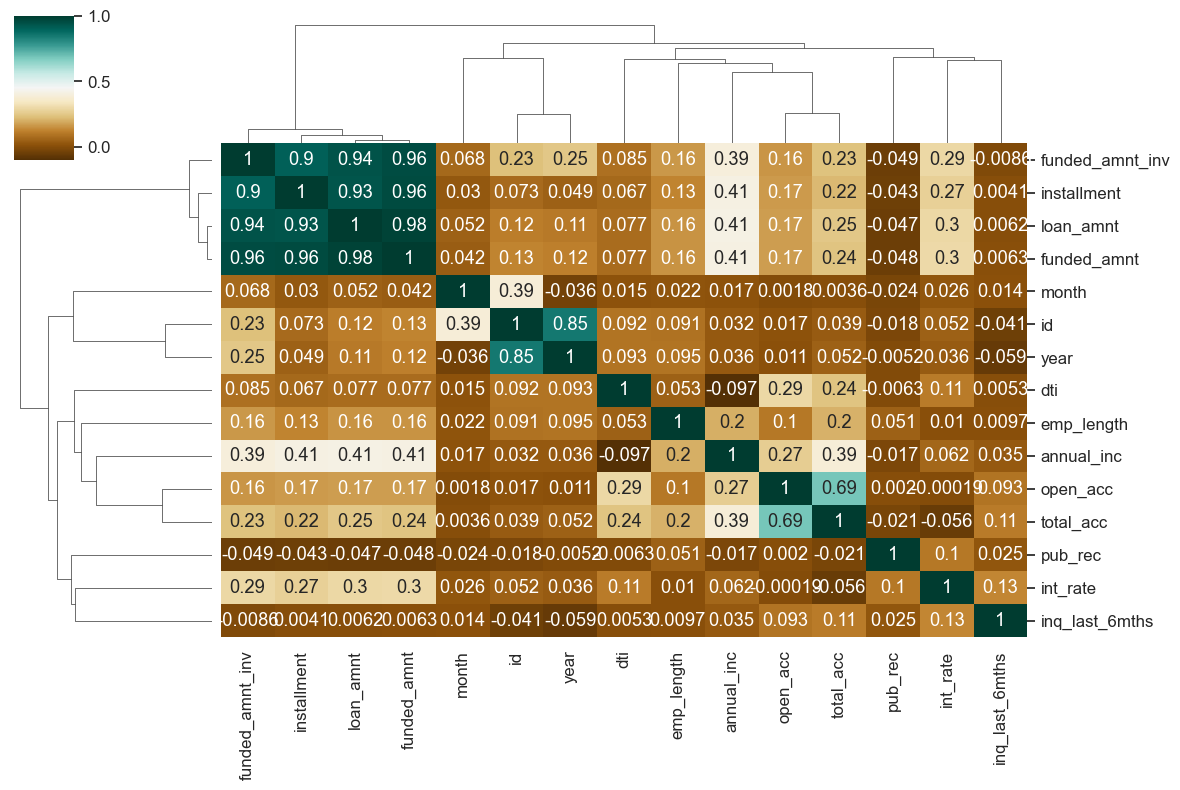

In [147]:
# Bivariate Analysis - Correlation Matrix-Quantitative Variables
# Heatmap with Dendogram(clustermap) to show closeness among numerical variables.
loan_correlation = loandata.corr()
sns.set(font_scale=1.1)
sns.clustermap(loan_correlation,annot=True,figsize=(12, 8),cmap="BrBG")
plt.show()

#### The above plot shows Below important Observations 
- Loan amount, investor amount, funding amount are strongly correlated.
- Annual income with DTI(Debt-to-income ratio) is negatively correalted.
- positive correlation between annual income and employment years.

### Data cleaning
- Drop additional columns which are not needed further in analysis.

In [149]:
loandata.drop(['installment'], axis =1, inplace=True)
loandata.shape

(37808, 28)

### Visualizing Categorical Data

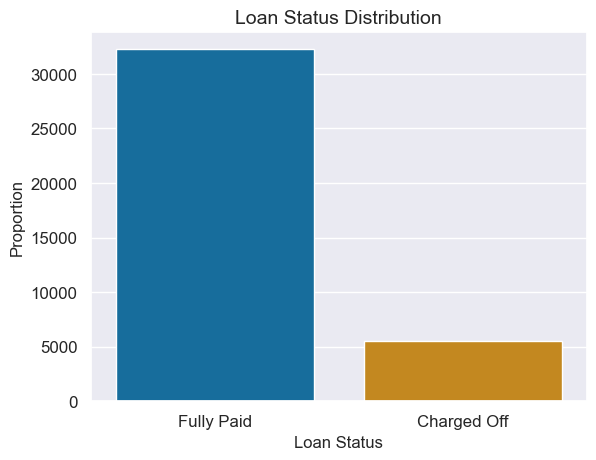

In [203]:
sns.countplot(x = 'loan_status', data = loandata)
plt.ylabel("Proportion", fontsize=12)
plt.xlabel("Loan Status", fontsize=12)
plt.title("Loan Status Distribution", fontsize=14)
plt.show()

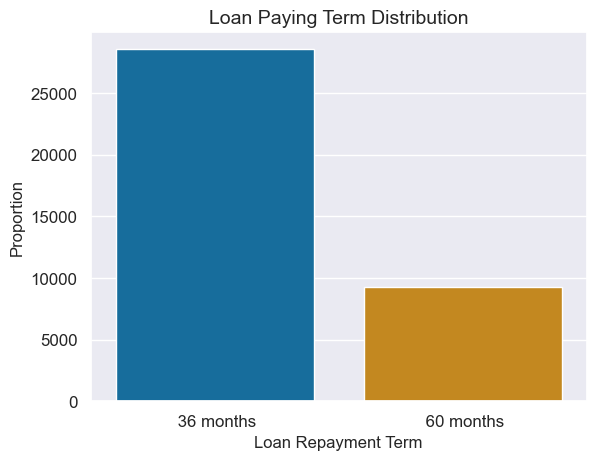

In [206]:
sns.countplot(x="term",data=loandata)
plt.ylabel("Proportion", fontsize=12)
plt.xlabel("Loan Repayment Term", fontsize=12)
plt.title("Loan Paying Term Distribution", fontsize=14)
plt.show()

- We are analyzing and visualizing only the defaulter data. So subsetting the data while plotting only for 'Charged Off' loan_status for below plots

In [151]:
loandata.sub_grade = pd.to_numeric(loandata.sub_grade.apply(lambda x : x[-1]))
loandata.sub_grade.head()

0    2
1    4
2    5
3    1
5    4
Name: sub_grade, dtype: int64

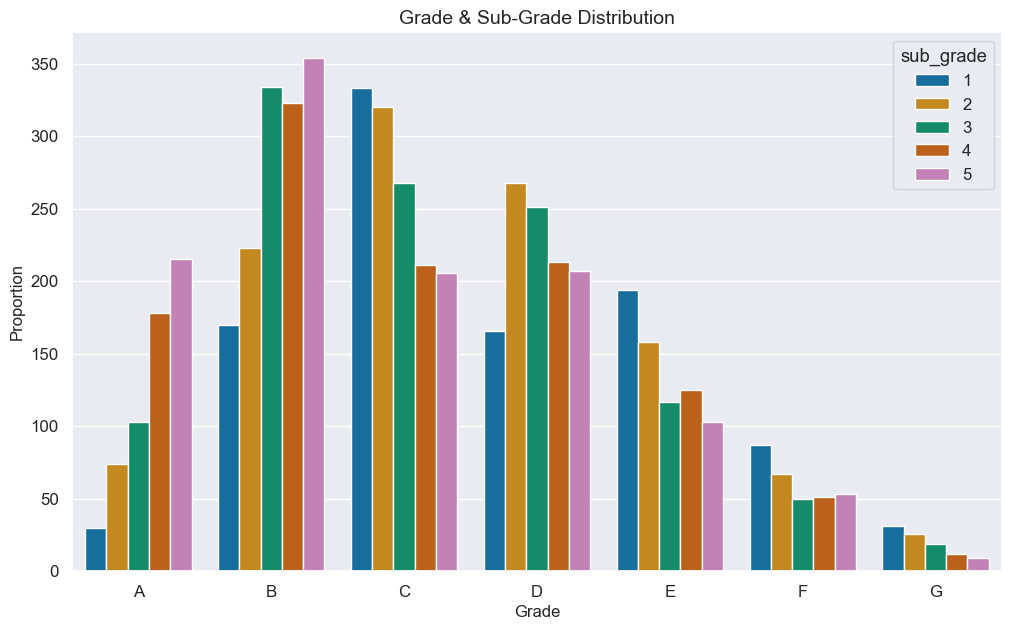

In [198]:
fig, ax = plt.subplots(figsize=(12,7))
sns.set_palette('colorblind')
sns.countplot(x = 'grade', order = ['A', 'B', 'C', 'D', 'E', 'F', 'G'] , hue = 'sub_grade',data = loandata[loandata.loan_status == 'Charged Off'])
plt.ylabel("Proportion", fontsize=12)
plt.xlabel("Grade", fontsize=12)
plt.title("Grade & Sub-Grade Distribution", fontsize=14)
plt.show()

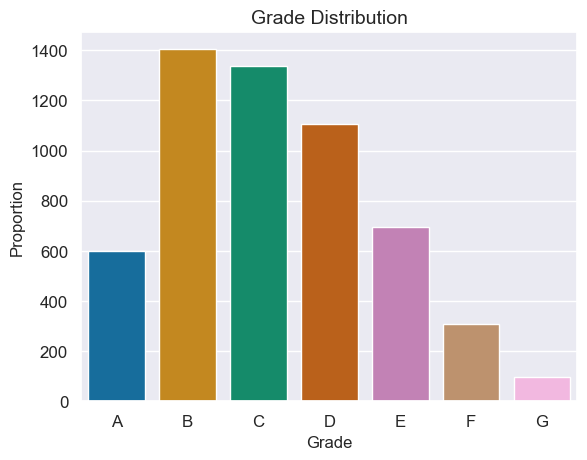

In [195]:
sns.countplot(x = 'grade', data = loandata[loandata.loan_status == 'Charged Off'], order = ['A', 'B', 'C', 'D', 'E', 'F', 'G'])
plt.ylabel("Proportion", fontsize=12)
plt.xlabel("Grade", fontsize=12)
plt.title("Grade Distribution", fontsize=14)
plt.show()

### Analyzing home_ownership

In [154]:
#checking unique values for home_ownership
loandata['home_ownership'].unique()

array(['RENT', 'OWN', 'MORTGAGE', 'OTHER', 'NONE'], dtype=object)

In [156]:
loandata['home_ownership'].value_counts()

RENT        18322
MORTGAGE    16464
OWN          2924
OTHER          95
NONE            3
Name: home_ownership, dtype: int64

- There are only 3 records with 'NONE' value in the data. So replacing the value with 'OTHER'

In [157]:
#replacing 'NONE' with 'OTHERS'
loandata['home_ownership'].replace(to_replace = ['NONE'],value='OTHER',inplace = True)

In [158]:
#checking unique values for home_ownership again
loandata['home_ownership'].unique()

array(['RENT', 'OWN', 'MORTGAGE', 'OTHER'], dtype=object)

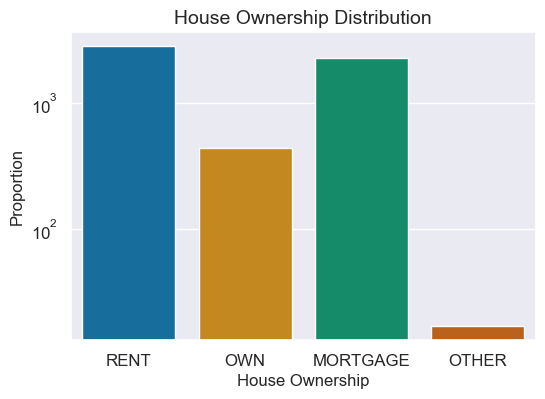

In [196]:
fig, ax = plt.subplots(figsize = (6,4))
ax.set(yscale = 'log')
sns.countplot(x='home_ownership', data=loandata[loandata['loan_status']=='Charged Off'])
plt.ylabel("Proportion", fontsize=12)
plt.xlabel("House Ownership", fontsize=12)
plt.title("House Ownership Distribution", fontsize=14)
plt.show()

### Analyzing purpose

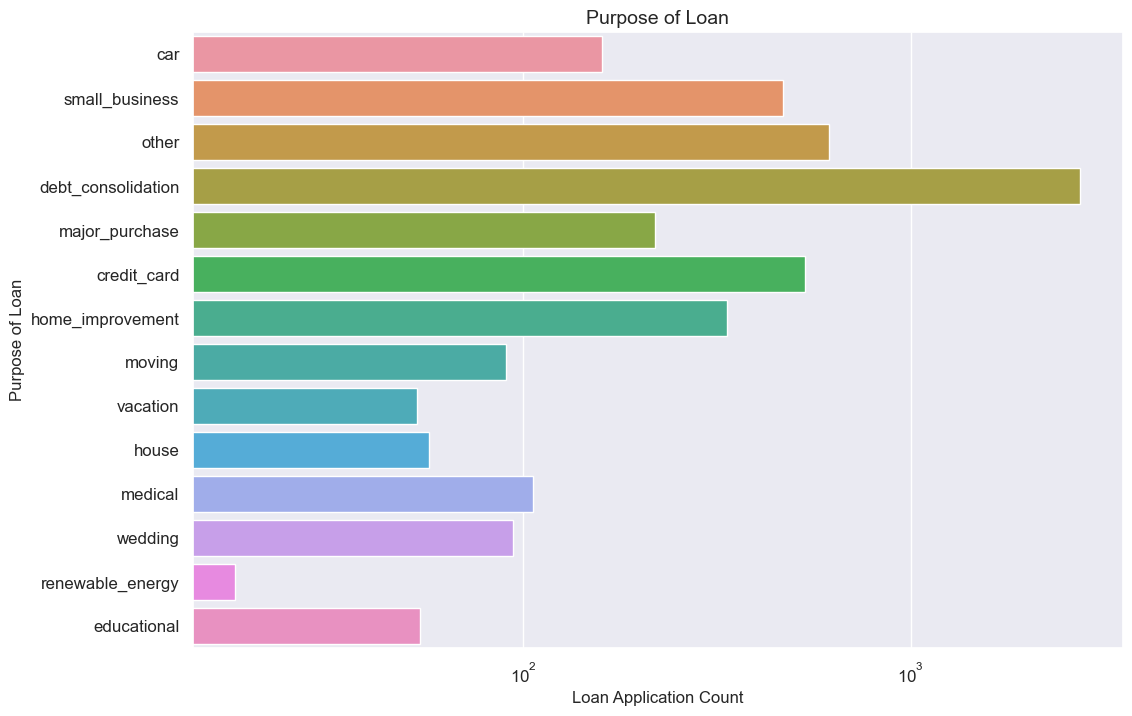

In [165]:
fig, ax = plt.subplots(figsize = (12,8))
ax.set(xscale = 'log')
sns.countplot(y="purpose", data=loandata[loandata.loan_status == 'Charged Off'])
plt.xlabel("Loan Application Count", fontsize=12)
plt.ylabel("Purpose of Loan", fontsize=12)
plt.title("Purpose of Loan", fontsize=14)
plt.show()

### Derived Column - Ordered Categorical Variables
- Let us look into number of loans which were approved every year/month
- Lets use derived column year to check pattern of loan issuing over the years.

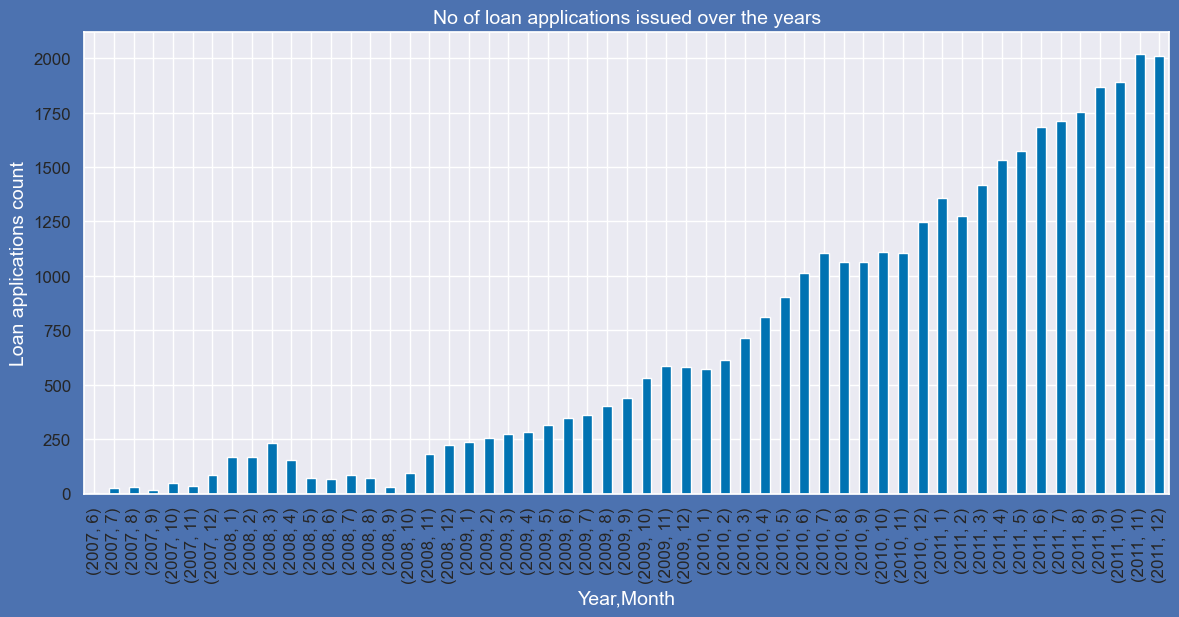

In [166]:
plt.figure(figsize=(14,6),facecolor='b')
loandata.groupby(['year','month']).id.count().plot(kind='bar')
plt.ylabel('Loan applications count',fontsize=14,color='w')
plt.xlabel('Year,Month',fontsize=14,color = 'w')      
plt.title("No of loan applications issued over the years",fontsize=14,color='w')
plt.show()

### Univariate Analysis - Ordered Categorical Variables- Loan Paying Term

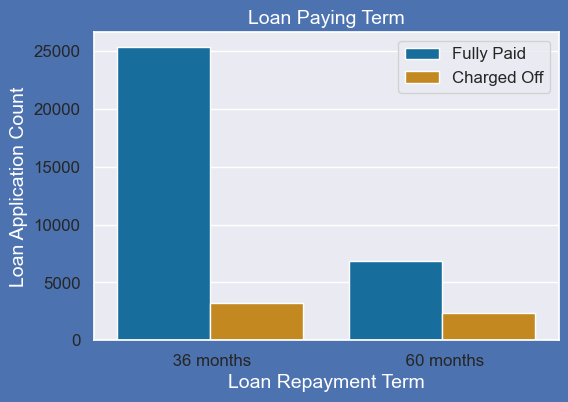

In [200]:
plt.figure(figsize=(6,4),facecolor='b')
ax = sns.countplot(x="term",data=loandata,hue='loan_status')
ax.set_title('Loan Paying Term',fontsize=14,color='w')
ax.set_xlabel('Loan Repayment Term',fontsize=14,color = 'w')
ax.set_ylabel('Loan Application Count',fontsize=14,color = 'w')      
ax.legend(bbox_to_anchor=(1, 1))
plt.show()

- Above plot shows that those who had taken loan to repay in 60 months had more % of number of applicants getting  charged off as compared to applicants who had taken loan for 36 months.

### Bivariate Analysis 
- Bivariate Analysis on annual income against Chargedoff_Proportion

In [170]:
inc_range_vs_loan = loandata.groupby(['annual_inc_cats', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
inc_range_vs_loan['Total'] = inc_range_vs_loan['Charged Off'] + inc_range_vs_loan['Fully Paid'] 
inc_range_vs_loan['Chargedoff_Proportion'] = inc_range_vs_loan['Charged Off'] / inc_range_vs_loan['Total']
inc_range_vs_loan.sort_values('Chargedoff_Proportion', ascending=False)

loan_status,annual_inc_cats,Charged Off,Fully Paid,Total,Chargedoff_Proportion
0,0-20000,237,943,1180,0.20
1,20000-40000,1514,7004,8518,0.18
2,40000-60000,1729,9534,11263,0.15
3,60000-80000,1024,6597,7621,0.13
4,80000 +,1045,8181,9226,0.11


- Lets draw bar plots on data calculated above. Try to visualize the pattern to understand the data better.

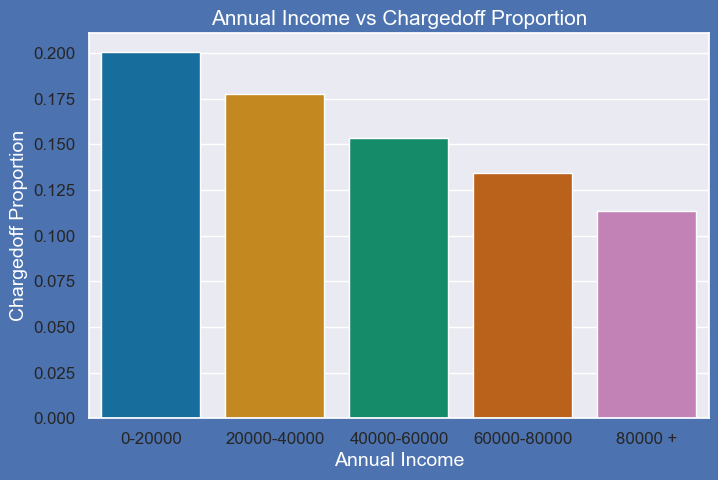

In [172]:
fig, ax1 = plt.subplots(figsize=(8, 5),facecolor='b')
ax1.set_title('Annual Income vs Chargedoff Proportion',fontsize=15,color = 'w')
ax1=sns.barplot(x='annual_inc_cats', y='Chargedoff_Proportion', data=inc_range_vs_loan)
ax1.set_ylabel('Chargedoff Proportion',fontsize=14,color = 'w')
ax1.set_xlabel('Annual Income',fontsize=14,color='w')
plt.show()

### Above plot shows that 
- Income range 80000+  has least chances of charged off.
- Income range 0-20000 has highest chances of charged off.

### Bivariate Analysis on purpose of Loan against Chargedoff_Proportion.

In [174]:
purpose_vs_loan = loandata.groupby(['purpose', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
purpose_vs_loan['Total'] = purpose_vs_loan['Charged Off'] + purpose_vs_loan['Fully Paid'] 
purpose_vs_loan['Chargedoff_Proportion'] = purpose_vs_loan['Charged Off'] / purpose_vs_loan['Total']
purpose_vs_loan.sort_values('Chargedoff_Proportion', ascending=False)

loan_status,purpose,Charged Off,Fully Paid,Total,Chargedoff_Proportion
11,small_business,469,1229,1698,0.28
10,renewable_energy,18,79,97,0.19
3,educational,54,265,319,0.17
9,other,617,3173,3790,0.16
5,house,57,296,353,0.16
7,medical,106,555,661,0.16
8,moving,90,476,566,0.16
2,debt_consolidation,2743,15036,17779,0.15
12,vacation,53,319,372,0.14
4,home_improvement,335,2405,2740,0.12


- here small Business applicants have high chnaces of getting charged off.
- renewable_energy where chanrged off proportion is better as compare to other categories.

#### Lets draw bar plots on data calculated above. Try to visualize the pattern to understand the data better.

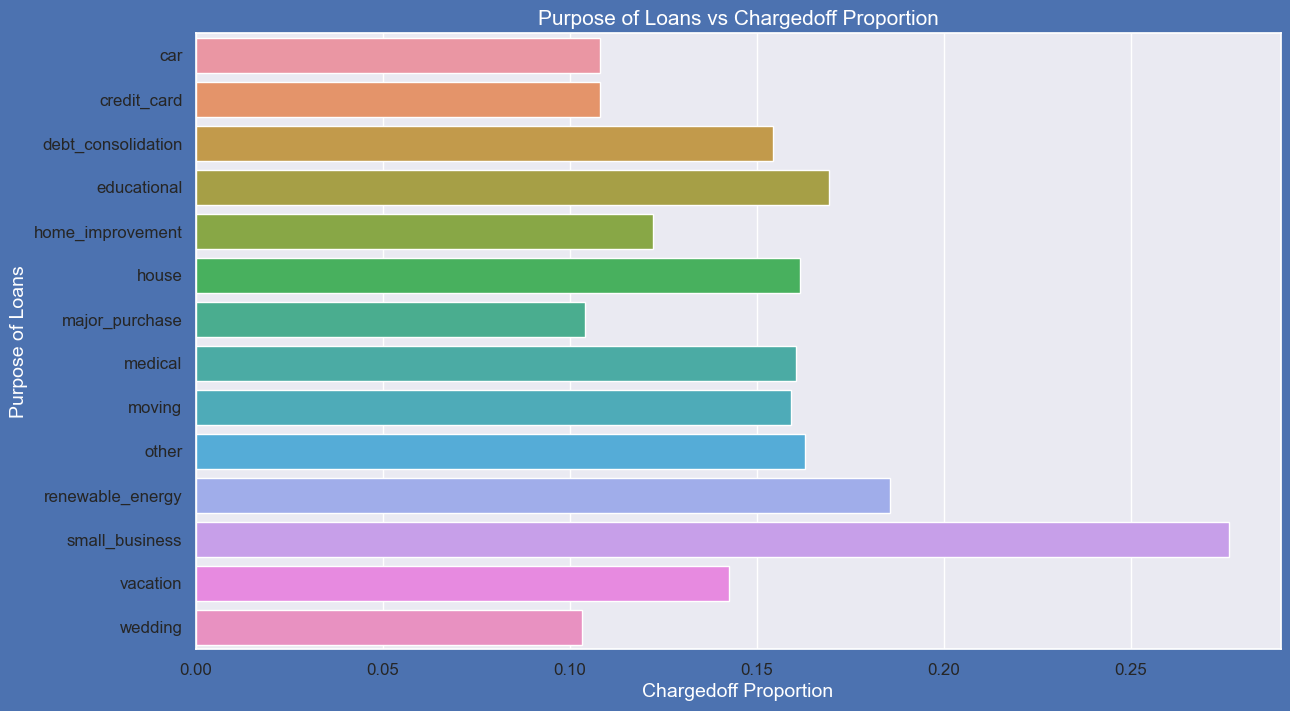

In [175]:
fig, ax1 = plt.subplots(figsize=(14, 8),facecolor='b')
ax1.set_title('Purpose of Loans vs Chargedoff Proportion',fontsize=15,color = 'w')
ax1=sns.barplot(y='purpose', x='Chargedoff_Proportion', data=purpose_vs_loan)
ax1.set_ylabel('Purpose of Loans',fontsize=14,color='w')
ax1.set_xlabel('Chargedoff Proportion',fontsize=14,color = 'w')
plt.show()

### Bivariate Analysis on interest rate against Chargedoff_Proportion

In [176]:
interest_vs_loan = loandata.groupby(['int_rate_cats', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
interest_vs_loan['Total'] = interest_vs_loan['Charged Off'] + interest_vs_loan['Fully Paid'] 
interest_vs_loan['Chargedoff_Proportion'] = interest_vs_loan['Charged Off'] / interest_vs_loan['Total']
interest_vs_loan.sort_values('Chargedoff_Proportion', ascending=False)

loan_status,int_rate_cats,Charged Off,Fully Paid,Total,Chargedoff_Proportion
3,16 +,1241,3267,4508,0.28
2,12.5-16,1985,9254,11239,0.18
1,10-13,1217,7984,9201,0.13
0,0-10,822,11314,12136,0.07


- interest rate less than 10% has very less chances of charged off. Intrest rates are starting from minimin 5 %.
- interest rate more than 16% has good chnaces of charged off as compared to other category intrest rates.
- Charged off proportion is increasing with higher intrest rates.

#### Lets draw some bar plots on data calculated above. Try to visualize the pattern to understand the data better.

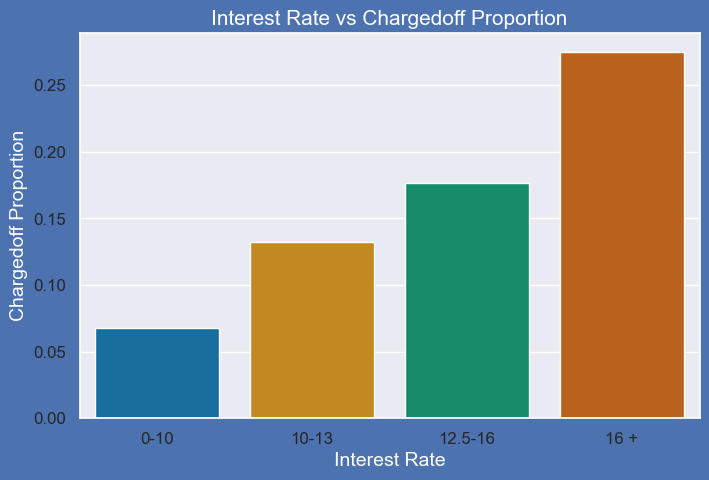

In [177]:
fig, ax1 = plt.subplots(figsize=(8, 5),facecolor='b')
ax1.set_title('Interest Rate vs Chargedoff Proportion',fontsize=15,color='w')
ax1=sns.barplot(x='int_rate_cats', y='Chargedoff_Proportion', data=interest_vs_loan)
ax1.set_xlabel('Interest Rate',fontsize=14,color='w')
ax1.set_ylabel('Chargedoff Proportion',fontsize=14,color = 'w')
plt.show()

### Bivariate Analysis on employment length against Chargedoff_Proportion

In [178]:
emplen_vs_loan = loandata.groupby(['emp_length', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
emplen_vs_loan['Total'] = emplen_vs_loan['Charged Off'] + emplen_vs_loan['Fully Paid'] 
emplen_vs_loan['Chargedoff_Proportion'] = emplen_vs_loan['Charged Off'] / emplen_vs_loan['Total']
emplen_vs_loan.sort_values('Chargedoff_Proportion', ascending=False)

loan_status,emp_length,Charged Off,Fully Paid,Total,Chargedoff_Proportion
0,0,226,796,1022,0.22
10,10,1304,6935,8239,0.16
7,7,261,1424,1685,0.15
5,5,451,2685,3136,0.14
1,1,1085,6476,7561,0.14
8,8,200,1198,1398,0.14
6,6,303,1827,2130,0.14
3,3,549,3399,3948,0.14
4,4,454,2821,3275,0.14
2,2,560,3650,4210,0.13


- Those who are not working or have less than 1 year of work experience have high chances of getting charged off.
- It makes sense as with less or no experience they don't have source of income to repay loan.
- Rest of the applicants have more or less same chnaces of getting charged off.

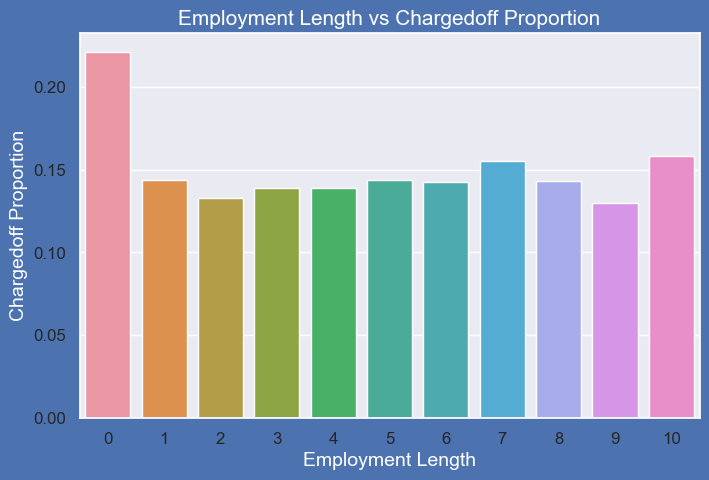

In [181]:
# Try to visualize the pattern to understand the data better.
fig, ax1 = plt.subplots(figsize=(8, 5),facecolor='b')
ax1.set_title('Employment Length vs Chargedoff Proportion',fontsize=15,color='w')
ax1=sns.barplot(x='emp_length', y='Chargedoff_Proportion', data=emplen_vs_loan)
ax1.set_xlabel('Employment Length',fontsize=14,color='w')
ax1.set_ylabel('Chargedoff Proportion',fontsize=14,color = 'w')
plt.show()

### Analysing annual income with other columns for more insights

#### Puprose of loan vs Loan amount

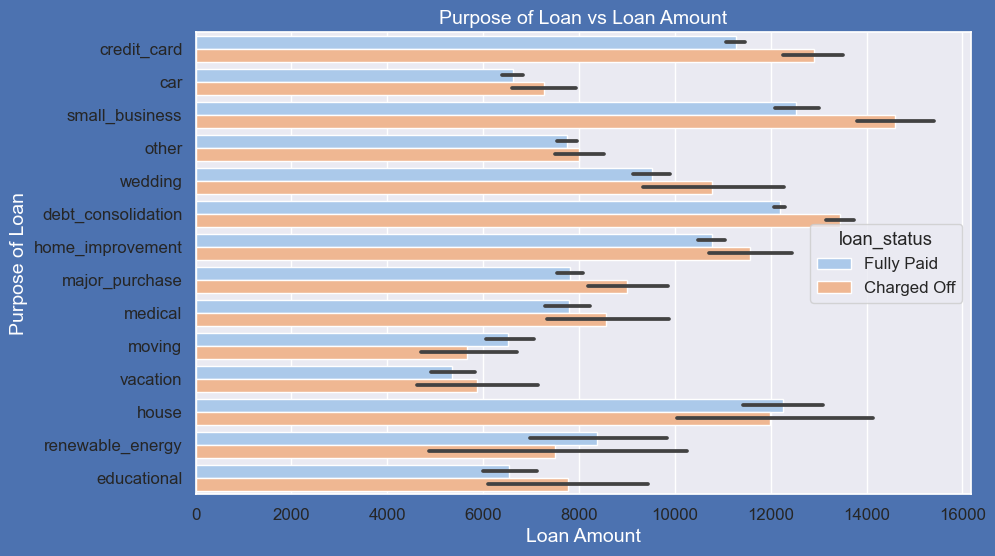

In [182]:
plt.figure(figsize=(10,6),facecolor='b')
sns.barplot(data =loandata,x='loan_amnt', y='purpose', hue ='loan_status',palette="pastel")
plt.ylabel('Purpose of Loan',fontsize=14,color='w')
plt.xlabel('Loan Amount',fontsize=14,color = 'w')      
plt.title("Purpose of Loan vs Loan Amount",fontsize=14,color='w')
plt.show()

-  Median,95th percentile,75th percentile of loan amount is highest for loan taken for small business purpose among all purposes. Debt consolidation is second and Credit card comes 3rd.

##### Term of loan vs Interest Rate

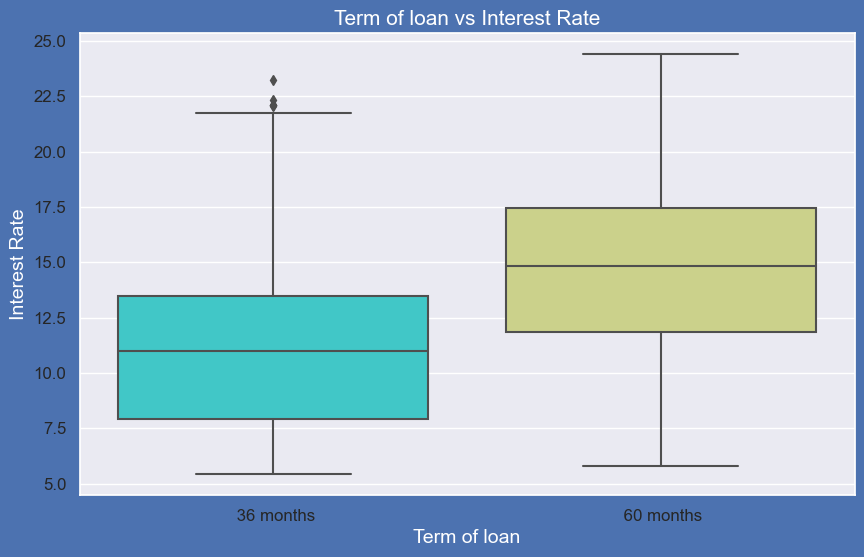

In [183]:
plt.figure(figsize=(10,6),facecolor='b')
sns.boxplot(y='int_rate', x='term', data =loandata,palette='rainbow')
plt.title('Term of loan vs Interest Rate',fontsize=15,color='w')
plt.ylabel('Interest Rate',fontsize=14,color = 'w')
plt.xlabel('Term of loan',fontsize=14,color = 'w')
plt.show()

##### Loan Amount vs Interest Rate

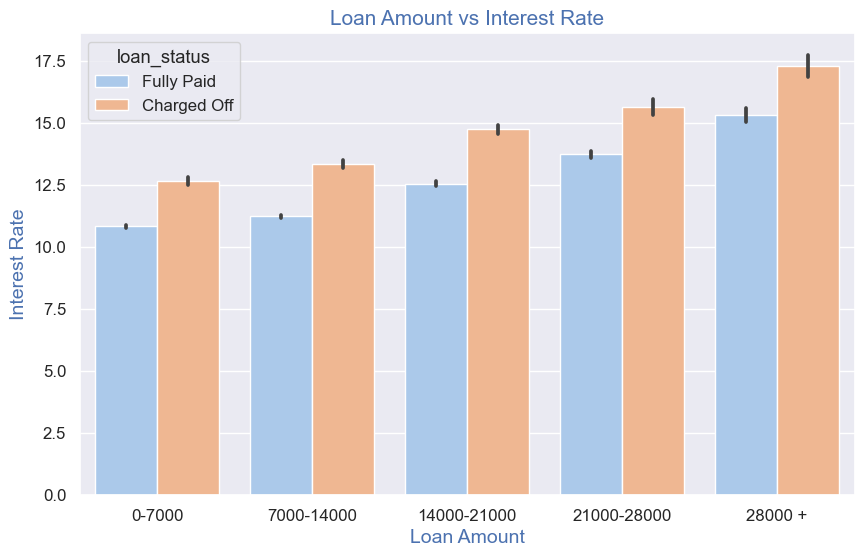

In [221]:
plt.figure(figsize=(10,6))
sns.barplot(data =loandata,x='loan_amnt_cats', y='int_rate', hue ='loan_status',palette="pastel")
plt.title('Loan Amount vs Interest Rate',fontsize=15,color='b')
plt.ylabel('Interest Rate',fontsize=14,color = 'b')
plt.xlabel('Loan Amount',fontsize=14,color = 'b')
plt.show()

- It is clear that intrest rate is increasing with loan amount increase.

#### Loan vs House Ownership

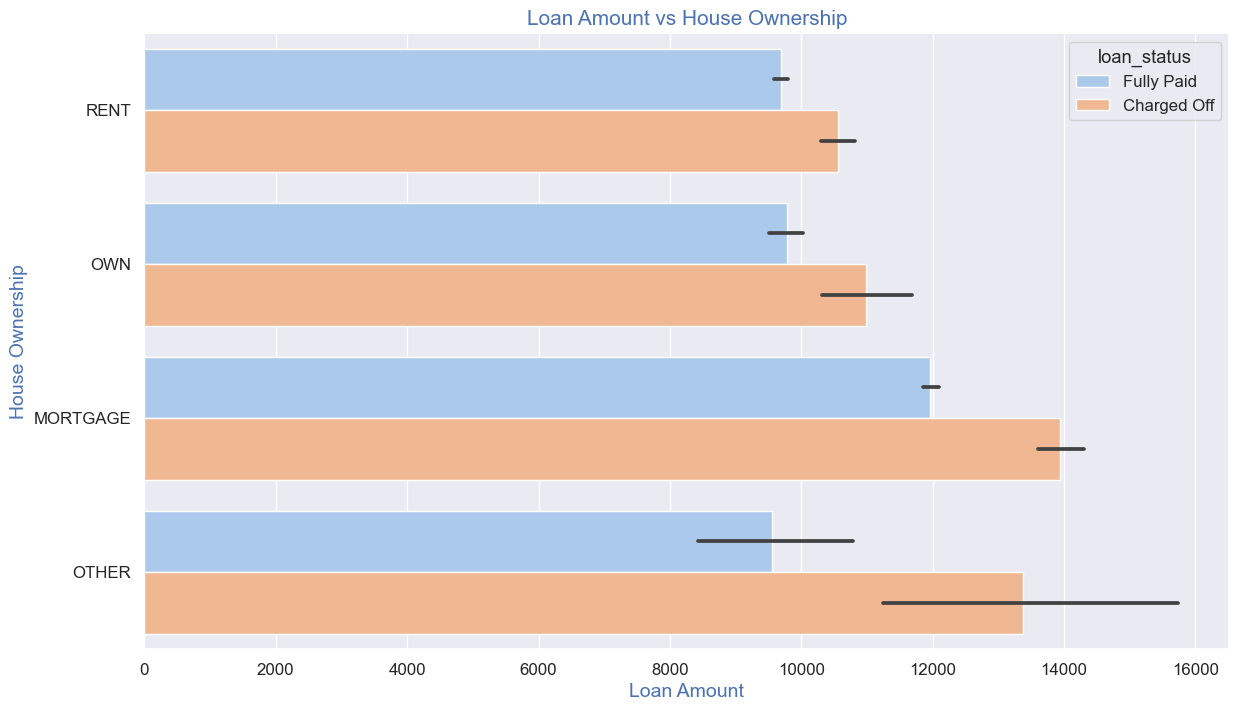

In [222]:
plt.figure(figsize=(14,8))
sns.barplot(data =loandata,x='loan_amnt', y='home_ownership', hue ='loan_status',palette="pastel")
plt.title('Loan Amount vs House Ownership',fontsize=15,color='b')
plt.ylabel('House Ownership',fontsize=14,color = 'b')
plt.xlabel('Loan Amount',fontsize=14,color = 'b')
plt.show()

#### Grade vs Interest Rate

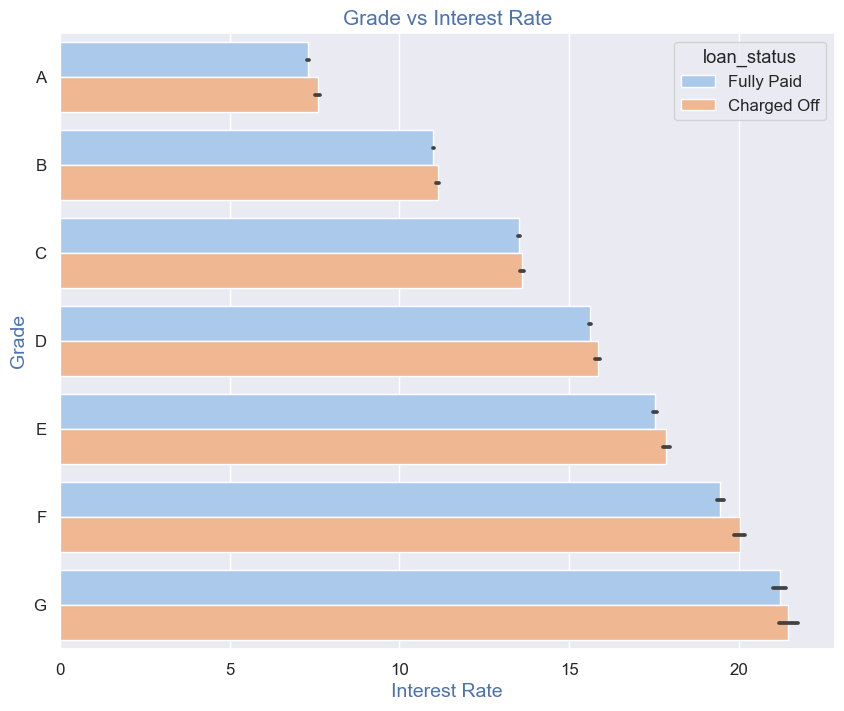

In [224]:
plt.figure(figsize=(10,8))
sns.barplot(data =loandata,x='int_rate', y='grade', hue ='loan_status',palette="pastel", order = 'ABCDEFG')
plt.title('Grade vs Interest Rate',fontsize=15,color='b')
plt.ylabel('Grade',fontsize=14,color = 'b')
plt.xlabel('Interest Rate',fontsize=14,color = 'b')
plt.show()

- intrest rate is increasing with grades moving from A to G

#### Debt to income ratio vs Interest Rate

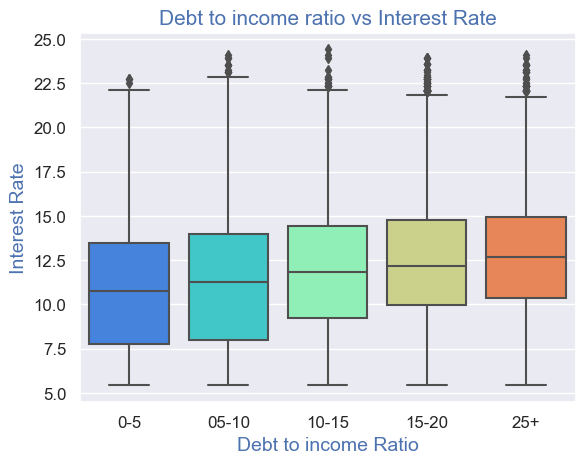

In [226]:
sns.boxplot(data =loandata,y='int_rate', x='dti_cats', palette="rainbow")
plt.title('Debt to income ratio vs Interest Rate',fontsize=15,color='b')
plt.xlabel('Debt to income Ratio',fontsize=14,color = 'b')
plt.ylabel('Interest Rate',fontsize=14,color = 'b')
plt.show()

#### Grade vs Annual income

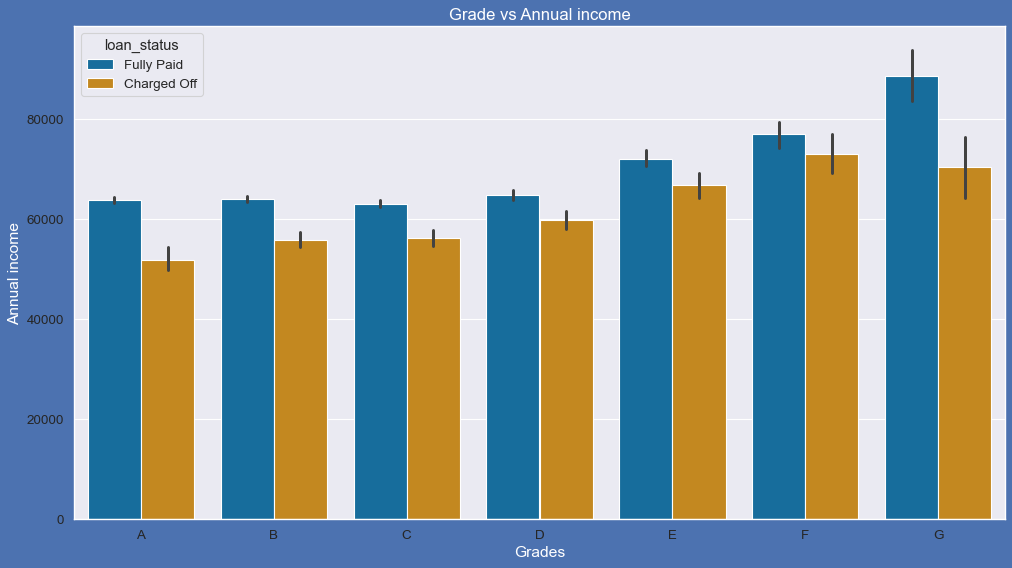

In [192]:
plt.figure(figsize=(15,8), dpi=80, facecolor='b', edgecolor='k')
sns.barplot(x='grade', y='annual_inc', hue="loan_status", data=loandata, estimator=np.mean,order='ABCDEFG')
plt.title('Grade vs Annual income',fontsize=15,color='w')
plt.ylabel('Annual income',fontsize=14,color = 'w')
plt.xlabel('Grades',fontsize=14,color = 'w')
plt.show()

#### Year vs Interest Rate

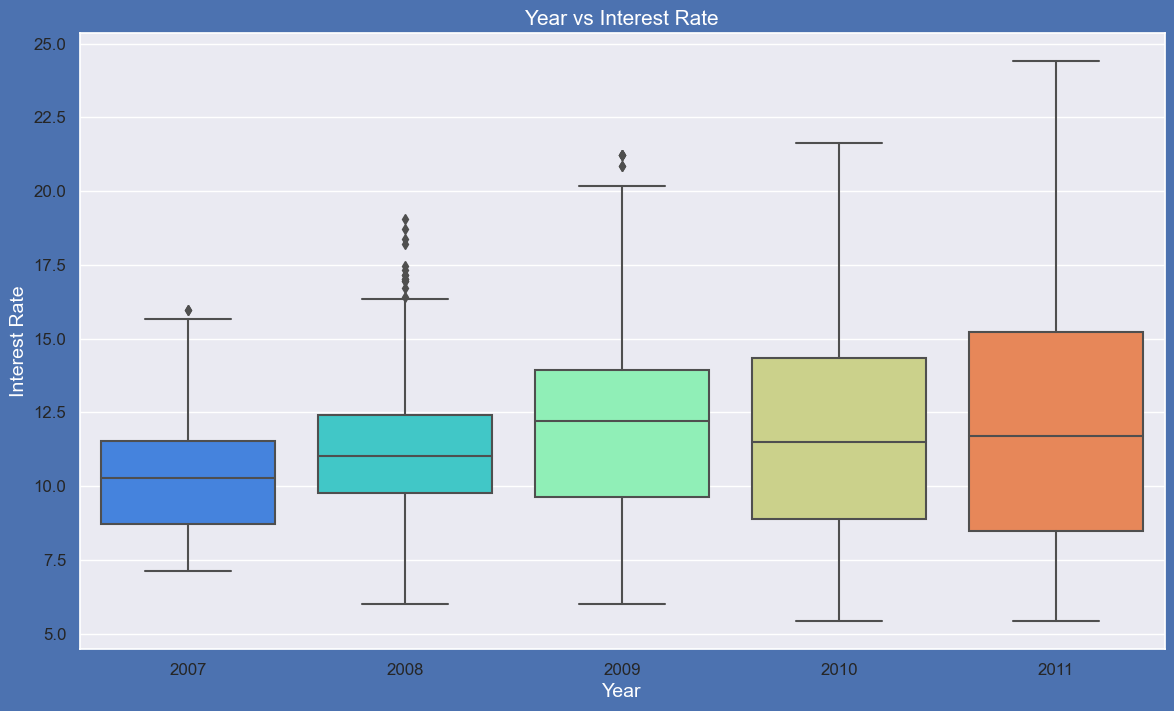

In [193]:
plt.figure(figsize=(14,8),facecolor='b')
sns.boxplot(y='int_rate', x='year', data =loandata,palette='rainbow')
plt.title('Year vs Interest Rate',fontsize=15,color='w')
plt.ylabel('Interest Rate',fontsize=14,color = 'w')
plt.xlabel('Year',fontsize=14,color = 'w')
plt.show()

## Observations

### Risk Assessment by Debt-to-Income Group: 
- The analysis indicates that the medium debt-to-income group in the lowest income range poses the highest risk when it comes to loan repayment. This group appears to be the most vulnerable to default on their loans.

### Key Factors Impacting Loan Default:
#### Minor Impact Factors:

- Higher loan amount (above 16K)
- Lower annual income (below 37K)
- Higher debt-to-income ratio (above 15%)
- Loan issue month (Dec, May, Sep)

#### Heavy Impact Factors:
- Higher interest rate (above 13%)
- Longer repayment term (5 years)
- Loan grade & sub-grade (D to G)
- Missing employment record
- Loan purpose (small business, renewable energy, educational)

#### Combined Impact Factors:

- High loan amount & interest rate for the lower income group
- Longer repayment term
- Home ownership (other) and loan purpose (car, moving, or small business)
- Income group and loan purpose